# Homework \#2
Name: Jonas Schweisthal \
Student number: s4535561

In [1]:
from model import Model
from dmchunk import Chunk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def ready_set_go(n_participants, n_trials = 1500):
    subjects = range(1,n_participants+1)
    conditions = [1, 2, 3]
    trials = range(1,n_trials+1)
    
    df = pd.DataFrame(columns = ["Subj", "Cond", "line", "Trial", "Ts", "Tp", "Main"])
    main = False
    line = 0
    for subj in subjects:
        for cond in conditions:
            # create a new model for each subject and condition as there's much time between testing the 
            # different conditions per subject
            m = Model() 
            for trial in trials:
                line += 1
                # Checking if trial is training trial
                if trial > 500:
                    main = True
                # 1 second preparing time
                m.time += 1 
                # no exact infos for truncated exponential distribution of random delay in paper:
                # -> simplifed with continuos random uniform 
                delay = np.random.uniform(0.25, 0.85)
                m.time += delay
                # draw out of 11 discrete values of discrete uniform distribution per condition
                # rounding necessary for equalling overlapping values of conditions
                if cond == 1:
                    ts = np.random.choice(np.linspace(0.49409, 0.84701, 11).round(4))
                elif cond == 2:
                    ts = np.random.choice(np.linspace(0.67055, 1.0235, 11).round(4))
                elif cond == 3:
                    ts = np.random.choice(np.linspace(0.84701, 1.1999, 11).round(4))
                m.time += ts
                # hard-code the response in each trial so that it is identical to the presented interval 
                tp = ts
                m.time += tp
                # store times in milliseconds in dataframe
                df.loc[line-1] = [subj, cond, line, trial, ts*1000, tp*1000, main]
                
    return df

In [3]:
df = ready_set_go(5)

C:\Users\jonas\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\jonas\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\jonas\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


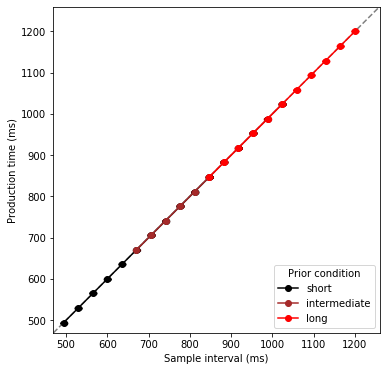

In [4]:
# Remove training trials
dat = df[df['Main'] == True]

# Calculate mean Tp by condition
mean_tp = dat.groupby(['Cond', 'Ts'])['Tp'].mean().reset_index()


yrange = np.multiply((min(mean_tp['Ts']), max(mean_tp['Ts'])), [0.95, 1.05])

# Subset data for plotting

cond1 = mean_tp.loc[mean_tp['Cond'] == 1]
cond2 = mean_tp.loc[mean_tp['Cond'] == 2]
cond3 = mean_tp.loc[mean_tp['Cond'] == 3]

# Add jitter noise
jitter = dat.copy()
jitter['Ts'] = jitter['Ts'] + np.random.uniform(-5, 5, len(dat))
cond1_jitter = jitter.loc[jitter['Cond'] == 1]
cond2_jitter = jitter.loc[jitter['Cond'] == 2]
cond3_jitter = jitter.loc[jitter['Cond'] == 3]

# Make plot
f, ax = plt.subplots(figsize = (6,6))

ax.set(xlim = yrange, ylim = yrange)
f.gca().set_aspect('equal', adjustable = 'box')

ax.set_xlabel('Sample interval (ms)')
ax.set_ylabel('Production time (ms)')

ax.plot(yrange, yrange, linestyle = '--', color ='gray')

ax.scatter(cond1_jitter['Ts'], cond1_jitter['Tp'], marker = '.', color = 'black', alpha = 0.025, label = None)
ax.scatter(cond2_jitter['Ts'], cond2_jitter['Tp'], marker = '.', color = 'brown', alpha = 0.025, label = None)
ax.scatter(cond3_jitter['Ts'], cond3_jitter['Tp'], marker = '.', color = 'red', alpha = 0.025, label = None)

ax.plot(cond1['Ts'], cond1['Tp'], color = 'black', marker = 'o', label = "short")
ax.plot(cond2['Ts'], cond2['Tp'], color = 'brown', marker = 'o', label = "intermediate")
ax.plot(cond3['Ts'], cond3['Tp'], color = 'red', marker = 'o', label = "long")

ax.legend(title = 'Prior condition', loc = 4)